In [1]:
# Import libraries.
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Pull observations from a linear system with some noise.
def obs(n):
    # Population values, unknown to us.
    b_0 = 2.4
    b_1 = 1.3
    e_std = 5

    # Generate observations with signal and noise.
    x = np.random.uniform(0, 10, n)
    s = b_0 + b_1 * x
    e = np.random.normal(0, e_std, x.shape[0])
    y = s + e
    
    return x, y

In [24]:
# Generate 50 observations in the range [0, 10).
n_obs = 50
x, y = obs(n_obs)

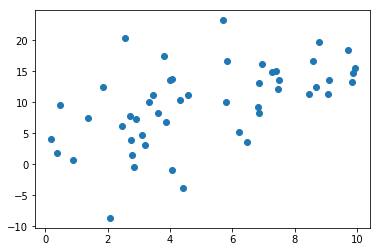

In [25]:
# Plot the population.
plt.scatter(x, y)
plt.show()

### Least Squares

To fit a line to our data, we need some way to measure how wrong our model is. This is called the cost function, and in this instance we'll use the sum of squares.

$$C = \sum_i(y_i - \hat{y_i})^2$$

where y_i is the y value for an individual measurement and $\hat{y_i}$ is the estimate our model gives for the y value for an individual measurement.

Minimising the sum of least squares gives, whilst holding the x, y values constant gives the following formulae to calculate the coefficients:

$$\hat{\beta_1} = \frac{\sum_i{(x_i - \bar{x})(y_i - \bar{y})}}{\sum_i{(x_i - \bar{x})^2}}$$

$$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$$

Note that the hat (^) symbol is used over the coefficients to show that these are estimates obtained from a sample. We cannot know the true population values.

In [26]:
# Using the formulae above to calculate coefficient estimates.
def reg_coef(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    b_1_hat = sum([(xi - x_mean) * (yi - y_mean) for xi, yi in zip(x, y)]) / sum([(xi - x_mean) ** 2 for xi in x])
    b_0_hat = y_mean - b_1_hat * x_mean
    
    return b_0_hat, b_1_hat

In [27]:
# Get coefficients.
b_0_hat, b_1_hat = reg_coef(x, y)

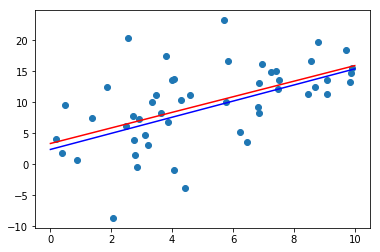

In [28]:
# Plot our estimate on the graph with the population line.
xp = np.linspace(0, 10, 100)
yp = b_0 + b_1 * xp
y_hat = b_0_hat + b_1_hat * xp
plt.scatter(x, y)
plt.plot(xp, yp, color='blue')
plt.plot(xp, y_hat, color='red')
plt.show()

### Sampling

For every sample we take, there will be some difference in our estimates of the coefficients. How can we estimate how close we are to the population values?

If we take enough samples, the average of the estimates obtained will be equal to the population values. Let's show this by generating 20 samples and plotting the values for the coefficients.

In [58]:
# Get coefficients for 10000 samples.
n_samples = 10000
n_obs = 50
b_0_hats = np.array([])
b_1_hats = np.array([])

for i in range(n_samples):
    x, y = obs(n_obs)
    b_0, b_1 = reg_coef(x, y)
    
    b_0_hats = np.append(b_0_hats, b_0)
    b_1_hats = np.append(b_1_hats, b_1)

In [59]:
# Calculate mean coefficients.
b_0_hat_mean = b_0_hats.mean()
b_1_hat_mean = b_1_hats.mean()

print(f"B0 mean: {b_0_hat_mean:.3}")
print(f"B1 mean: {b_1_hat_mean:.3}")

B0 mean: 2.39
B1 mean: 1.3


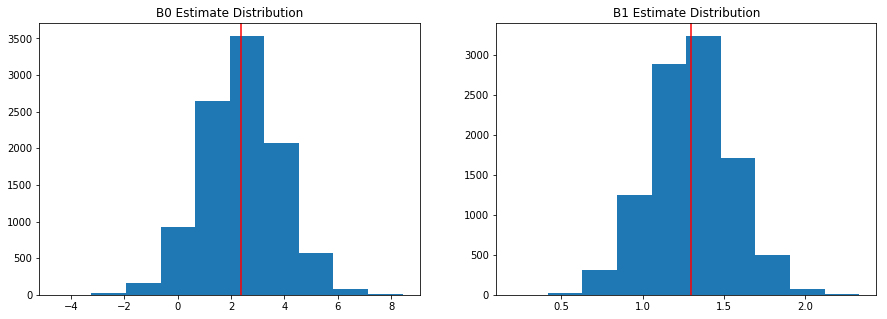

In [94]:
# Plot distribution of estimates.
f, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].hist(b_0_hats)
axes[0].axvline(x=b_0_hat_mean, color='red')
axes[0].set_title('B0 Estimate Distribution')

axes[1].hist(b_1_hats)
axes[1].axvline(x=b_1_hat_mean, color='red')
axes[1].set_title('B1 Estimate Distribution')

plt.show()

### Sample Distribution

We can see that the mean of the sampling distributions are very close to the population values given enough samples. However, we're going to treat the case where we only have one sample and need to determine the likely population value from this sample. To do this we need to know the shape of the sampling distribution for each coefficient. The standard deviation (called standard error) of the sampling distribution for each coefficient can be calculated as:

$$\hat{SE}(\hat{\beta_0})^2 = \sigma^2[\frac{1}{n} + \frac{\bar{x}^2}{\sum_i(x_i - \bar{x})^2}]$$

$$\hat{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_i(x_i - \bar{x})^2}$$

Although it's clearer to write $\hat{SE}$ as this signifies that this is only an estimate of the population value, this is sometimes just written as $SE$ for simplicity of notation.

In [ ]:
# Get SE estimates from initial sample.
